# Population Prediction using Exponential Regression

This notebook demonstrates how to predict population growth using exponential regression, which is well-suited for modeling population data that typically follows exponential growth patterns.

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from scipy.optimize import curve_fit
from math import sqrt

## Data Loading and Preprocessing

In [3]:
data = pd.read_csv(r'/home/budhayan/Documents/mic208-assgn/population-prediction/data/indian population new.csv')
useful_data = data[['Year', 'Population', '% Increase in Population']]

def fixdata(string):
    ans = ""
    for i in string:
        if i != ',':
            ans += i 
    return int(ans)

useful_data['Population'] = useful_data['Population'].apply(fixdata)
useful_data.head()

,Year,Population,% Increase in Population
0,1950,357021100,0.00%
1,1951,364922360,2.21%
2,1952,372997188,2.21%
3,1953,381227705,2.21%
4,1954,389731406,2.23%


## Exploratory Data Analysis

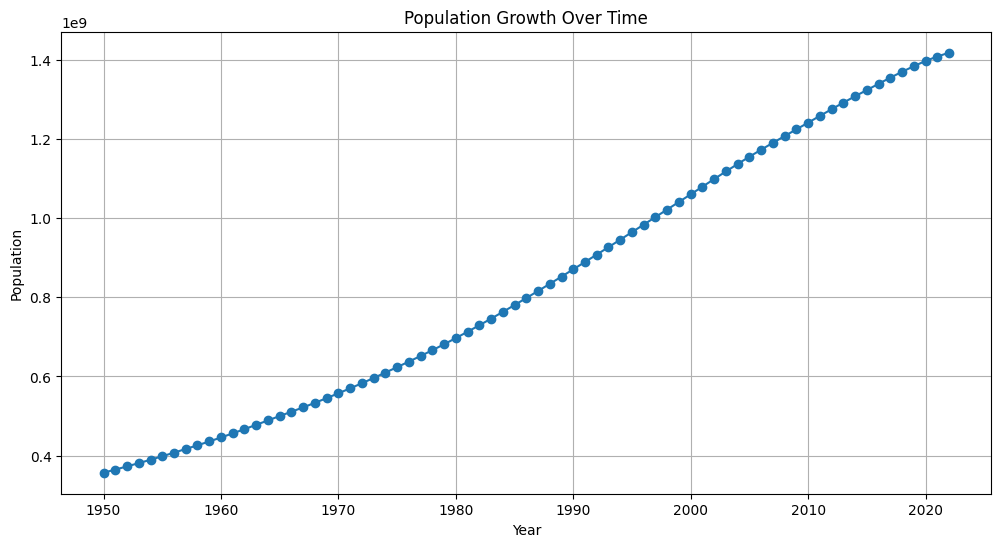

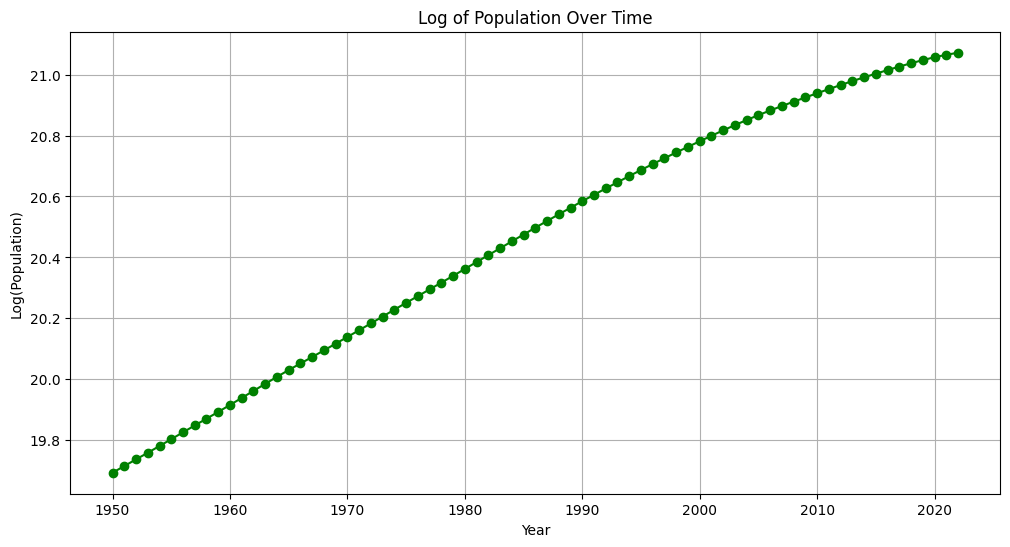

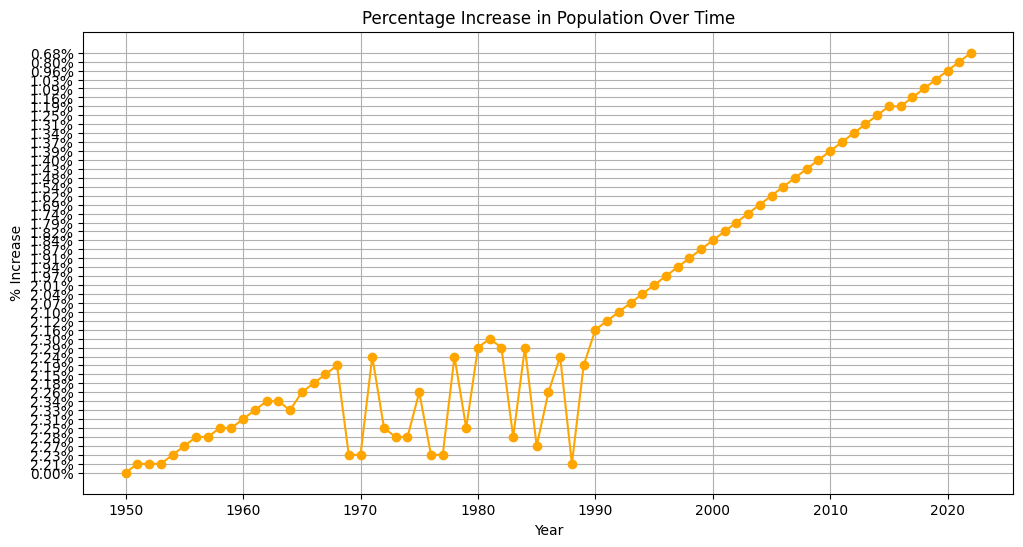

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(useful_data['Year'], useful_data['Population'], marker='o')
plt.title('Population Growth Over Time')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(useful_data['Year'], np.log(useful_data['Population']), marker='o', color='green')
plt.title('Log of Population Over Time')
plt.xlabel('Year')
plt.ylabel('Log(Population)')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(useful_data['Year'], useful_data['% Increase in Population'], marker='o', color='orange')
plt.title('Percentage Increase in Population Over Time')
plt.xlabel('Year')
plt.ylabel('% Increase')
plt.grid(True)
plt.show()

## Data Preparation for Exponential Regression

We'll split the data into training and testing sets. Since this is time series data, we'll use the earlier years for training and later years for testing.

In [6]:
X = useful_data['Year'].values.reshape(-1, 1)
y = useful_data['Population'].values
y_log = np.log(y)

train_size = 0.90
split_idx = int(len(X) * train_size)

X_train, X_test = X[:split_idx], X[split_idx:]
y_train_log, y_test_log = y_log[:split_idx], y_log[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print(f"Training data: {len(X_train)} samples")
print(f"Testing data: {len(X_test)} samples")

Training data: 65 samples
Testing data: 8 samples


## Linear Model for Log-Transformed Data

In [7]:
def linear_func(x, a, b):
    return a + b * (x - 1900)

params, covariance = curve_fit(linear_func, X_train.flatten(), y_train_log)
a, b = params
print(f"Fitted parameters: a={a:.6f}, b={b:.6f}")
print(f"The model equation is: log(Population) = {a:.6f} + {b:.6f} * (Year - 1900)")
print(f"In exponential form: Population = {np.exp(a):.2f} * exp({b:.6f} * (Year - 1900))")

Fitted parameters: a=18.668659, b=0.020979
The model equation is: log(Population) = 18.668659 + 0.020979 * (Year - 1900)
In exponential form: Population = 128143209.22 * exp(0.020979 * (Year - 1900))


## Exponential Regression Model

We'll define an exponential function and fit it to our data using curve_fit from scipy.

In [8]:
def predict_population(x):
    return np.exp(linear_func(x, a, b))

y_train_pred = predict_population(X_train.flatten())
y_test_pred = predict_population(X_test.flatten())

train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mpe = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
test_mpe = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

print("Training Metrics:")
print(f"RMSE: {train_rmse:.2f}")
print(f"MAE: {train_mae:.2f}")
print(f"R² Score: {train_r2:.4f}")
print(f"MPE: {train_mpe:.2f}%")
print("\nTesting Metrics:")
print(f"RMSE: {test_rmse:.2f}")
print(f"MAE: {test_mae:.2f}")
print(f"R² Score: {test_r2:.4f}")
print(f"MPE: {test_mpe:.2f}%")

Training Metrics:
RMSE: 24211062.02
MAE: 15975591.31
R² Score: 0.9931
MPE: 1.80%

Testing Metrics:
RMSE: 172954465.00
MAE: 167529084.49
R² Score: -29.4620
MPE: 12.13%


## Visualizing Results - Exponential Regression

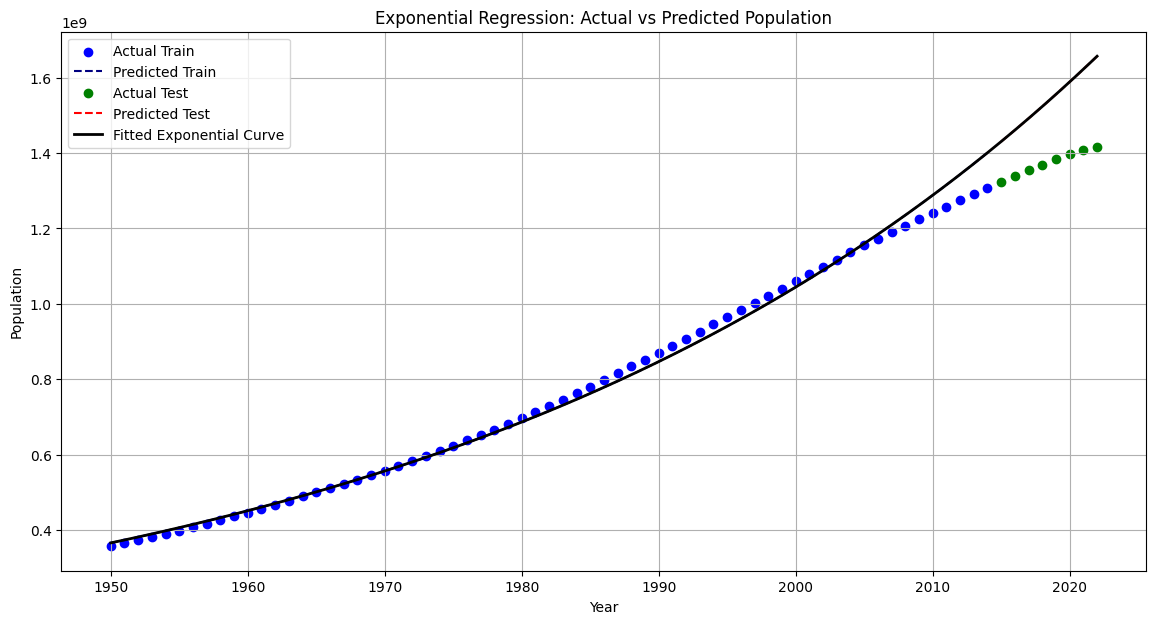

In [ ]:
plt.figure(figsize=(14, 7))

plt.scatter(X_train, y_train, color='blue', label='Actual Train')
plt.plot(X_train, y_train_pred, color='navy', linestyle='--', label='Predicted Train')

plt.scatter(X_test, y_test, color='green', label='Actual Test')
plt.plot(X_test, y_test_pred, color='red', linestyle='--', label='Predicted Test')

years = np.linspace(min(X_train.min(), X_test.min()), max(X_train.max(), X_test.max()), 1000)
plt.plot(years, predict_population(years), color='black', linewidth=2, label='Fitted Exponential Curve')

plt.title('Exponential Regression: Actual vs Predicted Population')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

## Model Evaluation with Log-Linear Approach

In [10]:
def predict_population(x):
    return np.exp(linear_func(x, a, b))

y_train_pred = predict_population(X_train.flatten())
y_test_pred = predict_population(X_test.flatten())

train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mpe = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
test_mpe = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

print("Training Metrics:")
print(f"RMSE: {train_rmse:.2f}")
print(f"MAE: {train_mae:.2f}")
print(f"R² Score: {train_r2:.4f}")
print(f"MPE: {train_mpe:.2f}%")
print("\nTesting Metrics:")
print(f"RMSE: {test_rmse:.2f}")
print(f"MAE: {test_mae:.2f}")
print(f"R² Score: {test_r2:.4f}")
print(f"MPE: {test_mpe:.2f}%")

Training Metrics:
RMSE: 24211062.02
MAE: 15975591.31
R² Score: 0.9931
MPE: 1.80%

Testing Metrics:
RMSE: 172954465.00
MAE: 167529084.49
R² Score: -29.4620
MPE: 12.13%


## Cross Validation for Time Series Data

In [11]:
tscv = TimeSeriesSplit(n_splits=5)
rmse_scores = []
r2_scores = []

for train_idx, test_idx in tscv.split(X):
    X_cv_train, X_cv_test = X[train_idx], X[test_idx]
    y_cv_train_log, y_cv_test = y_log[train_idx], y[test_idx]
    
    params_cv, _ = curve_fit(linear_func, X_cv_train.flatten(), y_cv_train_log)
    a_cv, b_cv = params_cv
    
    y_cv_pred = np.exp(linear_func(X_cv_test.flatten(), a_cv, b_cv))
    
    rmse = sqrt(mean_squared_error(y_cv_test, y_cv_pred))
    r2 = r2_score(y_cv_test, y_cv_pred)
    
    rmse_scores.append(rmse)
    r2_scores.append(r2)

print(f"Cross-validation RMSE: {np.mean(rmse_scores):.2f} (±{np.std(rmse_scores):.2f})")
print(f"Cross-validation R²: {np.mean(r2_scores):.4f} (±{np.std(r2_scores):.4f})")

Cross-validation RMSE: 49865745.23 (±66609800.09)
Cross-validation R²: -1.5453 (±4.5853)


## Visualizing Results - Log-Linear Model

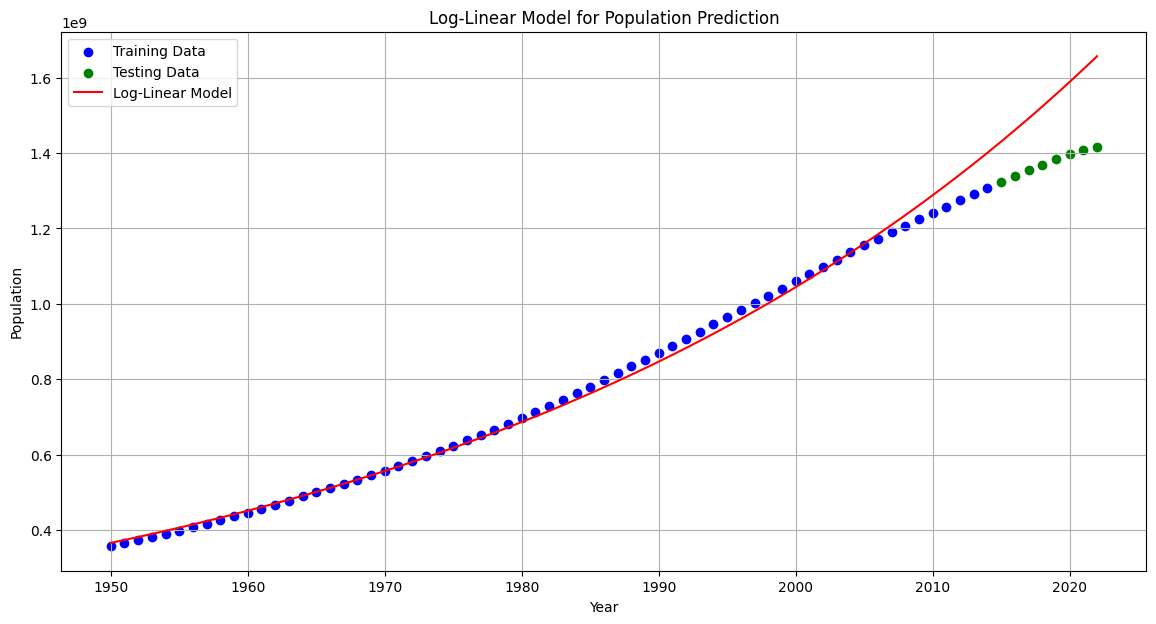

In [12]:
plt.figure(figsize=(14, 7))

plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')

years = np.linspace(min(X.flatten()), max(X.flatten()), 1000).reshape(-1, 1)
population_pred = predict_population(years.flatten())

plt.plot(years, population_pred, 'r-', label='Log-Linear Model')

plt.title('Log-Linear Model for Population Prediction')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

## Checking for Overfitting

We can check for overfitting by comparing the performance metrics between training and testing sets.

In [13]:
print(f"R² difference (train - test): {train_r2 - test_r2:.4f}")
print(f"RMSE difference (test - train): {test_rmse - train_rmse:.2f}")
print(f"MPE difference (test - train): {test_mpe - train_mpe:.2f}%")

if abs(train_r2 - test_r2) > 0.1 or test_rmse > 1.5 * train_rmse:
    print("Warning: The model may be overfitting.")
else:
    print("The model does not show significant signs of overfitting.")

R² difference (train - test): 30.4551
RMSE difference (test - train): 148743402.98
MPE difference (test - train): 10.33%


## Alternative Model: Logistic Growth

Logistic model parameters: L=2725047386.09, k=0.029274, x0=2015.93
The logistic model equation is: Population = 2725047386.09 / (1 + exp(-0.029274 * (Year - 2015.93)))
Logistic model training R²: 0.9994
Logistic model testing R²: -0.8564


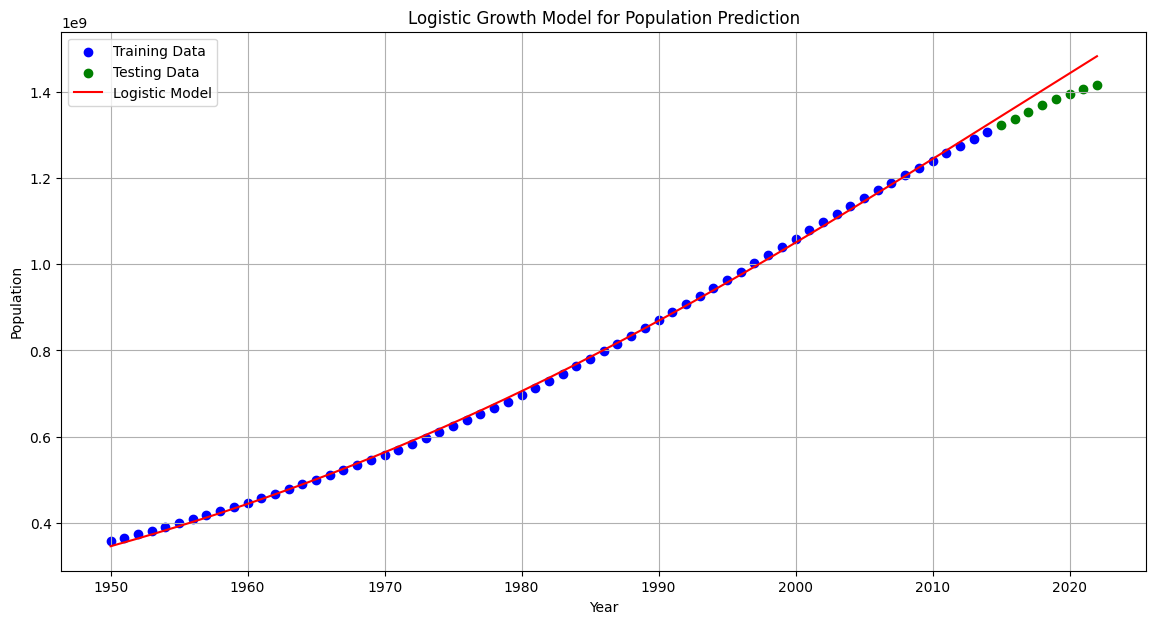

In [ ]:
def logistic_func(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

p0 = [max(y_train) * 1.5, 0.03, np.median(X_train)]

try:
    params_logistic, _ = curve_fit(logistic_func, X_train.flatten(), y_train, p0=p0, maxfev=10000)
    L, k, x0 = params_logistic
    
    print(f"Logistic model parameters: L={L:.2f}, k={k:.6f}, x0={x0:.2f}")
    print(f"The logistic model equation is: Population = {L:.2f} / (1 + exp(-{k:.6f} * (Year - {x0:.2f})))")
    
    y_train_pred_logistic = logistic_func(X_train.flatten(), L, k, x0)
    y_test_pred_logistic = logistic_func(X_test.flatten(), L, k, x0)
    
    train_r2_logistic = r2_score(y_train, y_train_pred_logistic)
    test_r2_logistic = r2_score(y_test, y_test_pred_logistic)
    
    print(f"Logistic model training R²: {train_r2_logistic:.4f}")
    print(f"Logistic model testing R²: {test_r2_logistic:.4f}")
    
    plt.figure(figsize=(14, 7))
    plt.scatter(X_train, y_train, color='blue', label='Training Data')
    plt.scatter(X_test, y_test, color='green', label='Testing Data')
    
    years = np.linspace(min(X.flatten()), max(X.flatten()), 1000).reshape(-1, 1)
    population_pred_logistic = logistic_func(years.flatten(), L, k, x0)
    
    plt.plot(years, population_pred_logistic, 'r-', label='Logistic Model')
    
    plt.title('Logistic Growth Model for Population Prediction')
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.legend()
    plt.grid(True)
    plt.show()
except:
    print("Logistic model fitting failed. Using log-linear model only.")

## Future Population Prediction

In [15]:
future_years = np.array([2025, 2030, 2035, 2040, 2045, 2050]).reshape(-1, 1)
future_predictions = predict_population(future_years.flatten())

try:
    future_predictions_logistic = logistic_func(future_years.flatten(), L, k, x0)
    future_df = pd.DataFrame({
        'Year': future_years.flatten(),
        'Log-Linear Model': future_predictions,
        'Logistic Model': future_predictions_logistic
    })
except:
    future_df = pd.DataFrame({
        'Year': future_years.flatten(),
        'Log-Linear Model': future_predictions
    })

print("Future Population Predictions:")
print(future_df)

Future Population Predictions:
   Year  Log-Linear Model  Logistic Model
0  2025      1.764263e+09    1.542416e+09
1  2030      1.959377e+09    1.639286e+09
2  2035      2.176070e+09    1.733322e+09
3  2040      2.416727e+09    1.823693e+09
4  2045      2.683998e+09    1.909702e+09
5  2050      2.980828e+09    1.990808e+09


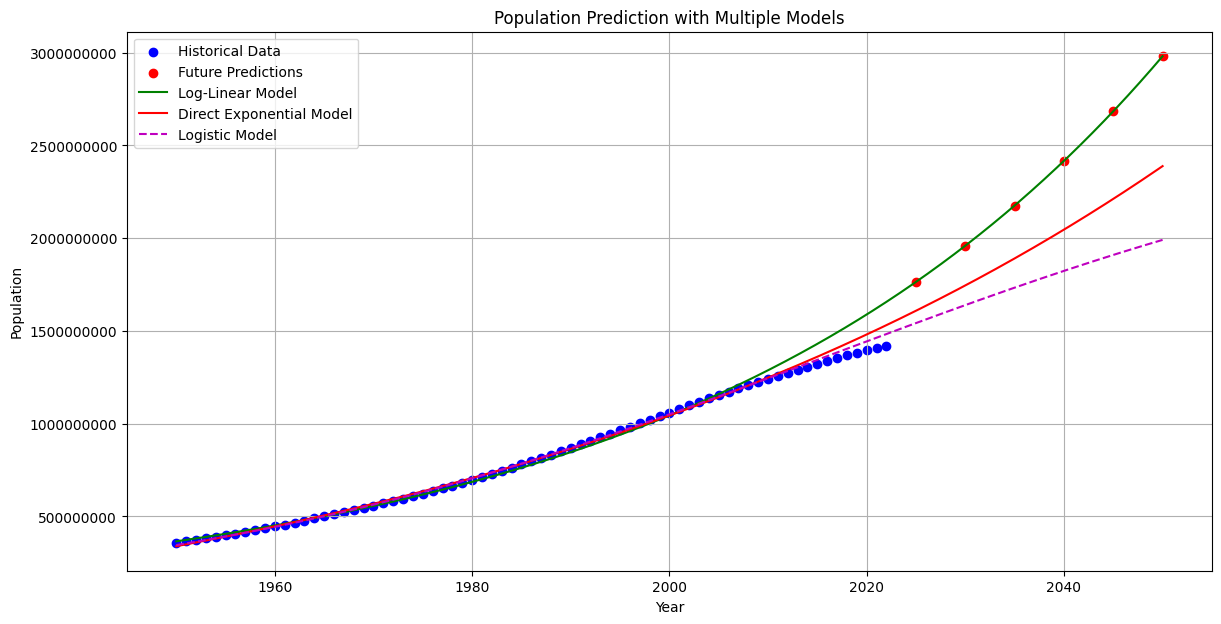

In [16]:
plt.figure(figsize=(14, 7))

plt.scatter(X, y, color='blue', label='Historical Data')
plt.scatter(future_years, future_predictions, color='red', label='Future Predictions')

all_years = np.concatenate([X.flatten(), future_years.flatten()])
years_range = np.linspace(min(all_years), max(all_years), 1000).reshape(-1, 1)

population_pred_loglinear = predict_population(years_range.flatten())
plt.plot(years_range, population_pred_loglinear, 'g-', label='Log-Linear Model')

def exponential_func(x, a, b, c):
    return a * np.exp(b * (x - 1900)) + c

try:
    exp_params, _ = curve_fit(exponential_func, X_train.flatten(), y_train, 
                             p0=[1, 0.01, 0], maxfev=10000)
    a_exp, b_exp, c_exp = exp_params
    
    population_pred_exponential = exponential_func(years_range.flatten(), a_exp, b_exp, c_exp)
    plt.plot(years_range, population_pred_exponential, 'r-', label='Direct Exponential Model')
    
except:
    print("Could not fit direct exponential model")

try:
    population_pred_logistic_extended = logistic_func(years_range.flatten(), L, k, x0)
    plt.plot(years_range, population_pred_logistic_extended, 'm--', label='Logistic Model')
except:
    pass

plt.title('Population Prediction with Multiple Models')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
plt.show()